In [1]:
# Import necessary libraries
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("final_trial.csv")

# Preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Poem'].apply(preprocess)

# Split the poem column into individual stanzas
df['stanzas'] = df['Poem'].apply(sent_tokenize)

# Convert emotions column to numerical labels
emotions = ['love', 'sad', 'anger', 'hate', 'fear', 'surprise', 'courage', 'joy', 'peace',"hope","care"]
df['emotion_label'] = df['Emotion'].apply(emotions.index)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['stanzas'], df['emotion_label'], test_size=0.2, random_state=42)

# Extract features from the stanzas using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform([' '.join(stanza) for stanza in X_train])
X_test_tfidf = vectorizer.transform([' '.join(stanza) for stanza in X_test])

# Train a passive aggressive classifier model
model = PassiveAggressiveClassifier(random_state=42,max_iter=100)
model.fit(X_train_tfidf, y_train)

# Evaluate the performance of the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

# Use the trained model to predict the emotion of each stanza in a new poem
new_poem = """
My mother bore me in the southern wild,
And I am black, but O! my soul is white;
White as an angel is the English child: 
But I am black as if bereav'd of light.

My mother taught me underneath a tree 
And sitting down before the heat of day,
She took me on her lap and kissed me,
And pointing to the east began to say. 

Look on the rising sun: there God does live 
And gives his light, and gives his heat away. 
And flowers and trees and beasts and men receive
Comfort in morning joy in the noonday.

And we are put on earth a little space,
That we may learn to bear the beams of love, 
And these black bodies and this sun-burnt face
Is but a cloud, and like a shady grove.

For when our souls have learn'd the heat to bear 
The cloud will vanish we shall hear his voice. 
Saying: come out from the grove my love & care,
And round my golden tent like lambs rejoice.

Thus did my mother say and kissed me, 
And thus I say to little English boy. 
When I from black and he from white cloud free,
And round the tent of God like lambs we joy: 

Ill shade him from the heat till he can bear, 
To lean in joy upon our fathers knee. 
And then I'll stand and stroke his silver hair,
And be like him and he will then love me.
"""
new_stanzas = sent_tokenize(new_poem)
new_stanzas_tfidf = vectorizer.transform(new_stanzas)
new_stanzas_emotions = model.predict(new_stanzas_tfidf)
new_stanzas_emotions = [emotions[label] for label in new_stanzas_emotions]
for stanza, emotion in zip(new_stanzas, new_stanzas_emotions):
    print('stanzas:', stanza.strip())
    print('Emotion:', emotion)
    print("\n")

Accuracy: 37.17434869739479 %
stanzas: My mother bore me in the southern wild,
And I am black, but O!
Emotion: sad


stanzas: my soul is white;
White as an angel is the English child: 
But I am black as if bereav'd of light.
Emotion: sad


stanzas: My mother taught me underneath a tree 
And sitting down before the heat of day,
She took me on her lap and kissed me,
And pointing to the east began to say.
Emotion: love


stanzas: Look on the rising sun: there God does live 
And gives his light, and gives his heat away.
Emotion: courage


stanzas: And flowers and trees and beasts and men receive
Comfort in morning joy in the noonday.
Emotion: hope


stanzas: And we are put on earth a little space,
That we may learn to bear the beams of love, 
And these black bodies and this sun-burnt face
Is but a cloud, and like a shady grove.
Emotion: sad


stanzas: For when our souls have learn'd the heat to bear 
The cloud will vanish we shall hear his voice.
Emotion: hope


stanzas: Saying: come out f

In [3]:
# Import necessary libraries
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("PERC_mendelly.csv")

#df = pd.read_csv("final_trial.csv")
df = df.dropna()

# Preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Poem'].apply(preprocess)

# Split the poem column into individual stanzas
df['stanzas'] = df['Poem'].apply(sent_tokenize)

# Convert emotions column to numerical labels
emotions = ['love', 'sad', 'anger', 'hate', 'fear', 'surprise', 'courage', 'joy', 'peace',"hope",'care']
df['emotion_label'] = df['Emotion'].apply(emotions.index)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['stanzas'], df['emotion_label'], test_size=0.2, random_state=42)

# Extract features from the stanzas using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform([' '.join(stanza) for stanza in X_train])
X_test_tfidf = vectorizer.transform([' '.join(stanza) for stanza in X_test])

# Train a Passive Aggressive Classifier
model = PassiveAggressiveClassifier(C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Save the trained model
# joblib.dump(model, 'pac_perc.joblib')

# Evaluate the performance of the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

# Use the trained model to predict the emotion of each stanza in a new poem
new_poem = """
I have found the secret of loving you.
"""
new_stanzas = sent_tokenize(new_poem)

for stanza in new_stanzas:
    lines = stanza.strip().split('\n')
    line_emotions = []
    for line in lines:
        line_tfidf = vectorizer.transform([preprocess(line)])
        line_emotion = emotions[model.predict(line_tfidf)[0]]
        line_emotions.append(line_emotion)
    print('Stanza:')
    print(stanza)
    print('Emotions:')
    print(line_emotions)
    print("\n")
from sklearn.metrics import confusion_matrix

# ...

# Evaluate the performance of the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 45.20547945205479 %
Stanza:

I have found the secret of loving you.
Emotions:
['love']


Accuracy: 45.20547945205479 %
Confusion Matrix:
[[20  6  1  0  0  0  0  2  3]
 [ 9 13  1  1  0  0  2  8  1]
 [ 2  0  6  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 2  1  0  0  1  0  3  1  0]
 [ 0  0  0  0  0  2  0  1  0]
 [ 2  0  1  0  1  0  8  2  2]
 [ 7  6  0  0  0  0  2 12  2]
 [ 6  1  0  0  0  0  0  3  2]]


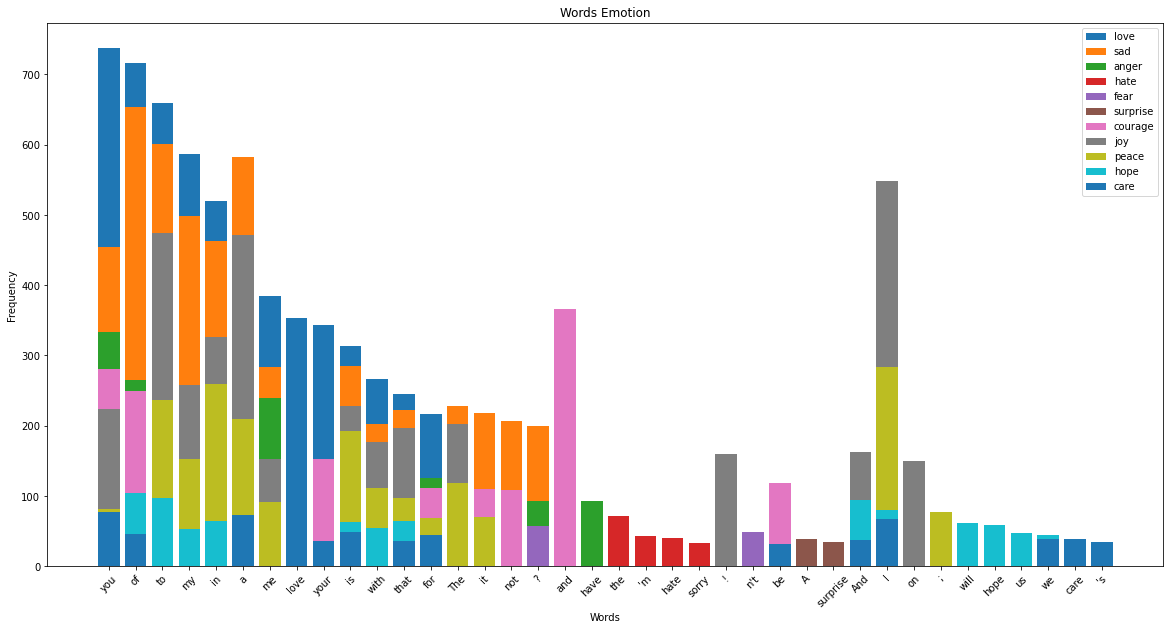

In [14]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Load the dataset
df = pd.read_csv("final_trial.csv")

# Preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Poem'].apply(preprocess)

# Convert emotions column to numerical labels
emotions = ['love', 'sad', 'anger', 'hate', 'fear', 'surprise', 'courage', 'joy', 'peace', 'hope', 'care']
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['Emotion'])

# Calculate word frequencies for each emotion label
word_frequencies = {}
for emotion in emotions:
    # Get stanzas for the current emotion
    stanzas = df[df['Emotion'] == emotion]['Poem']
    # Concatenate all stanzas into a single string
    text = ' '.join(stanzas)
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Calculate word frequencies
    frequencies = nltk.FreqDist(tokens)
    # Store the word frequencies for the current emotion
    word_frequencies[emotion] = frequencies

# Plot word frequencies for each emotion
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
for emotion in emotions:
    frequencies = word_frequencies[emotion]
    common_words = frequencies.most_common(30)  # Get top 30 most common words
    words, counts = zip(*common_words)
    selected_words = words[5:19]  # Select the range of words from the 20th to the 30th word
    selected_counts = counts[5:19]
    plt.bar(selected_words, selected_counts, label=emotion)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Words Emotion')
plt.legend()
plt.xticks(rotation=45)
plt.show()



Accuracy: 45.20547945205479 %
Confusion Matrix: [[20  6  1  0  0  0  0  2  3]
 [ 9 13  1  1  0  0  2  8  1]
 [ 2  0  6  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 2  1  0  0  1  0  3  1  0]
 [ 0  0  0  0  0  2  0  1  0]
 [ 2  0  1  0  1  0  8  2  2]
 [ 7  6  0  0  0  0  2 12  2]
 [ 6  1  0  0  0  0  0  3  2]]


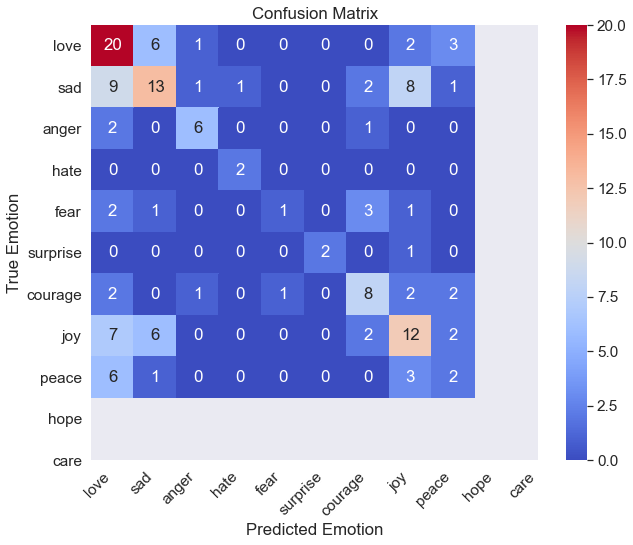

In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("PERC_mendelly.csv")
df = df.dropna()

# Preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Poem'].apply(preprocess)

# Split the poem column into individual stanzas
df['stanzas'] = df['Poem'].apply(sent_tokenize)

# Convert emotions column to numerical labels
emotions = ['love', 'sad', 'anger', 'hate', 'fear', 'surprise', 'courage', 'joy', 'peace', 'hope', 'care']
df['emotion_label'] = df['Emotion'].apply(emotions.index)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['stanzas'], df['emotion_label'], test_size=0.2, random_state=42)

# Extract features from the stanzas using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform([' '.join(stanza) for stanza in X_train])
X_test_tfidf = vectorizer.transform([' '.join(stanza) for stanza in X_test])

# Train a Passive Aggressive Classifier
model = PassiveAggressiveClassifier(C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the performance of the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

# Create a figure and axis
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=emotions, yticklabels=emotions)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(emotions))+0.5, labels=emotions, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(emotions))+0.5, labels=emotions, rotation=0)

# Display the plot
plt.show()
